# Scipy 速習
http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html#id1

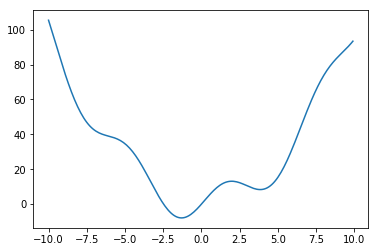

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2 + 10*np.sin(x)

# 可視化
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

In [30]:
from scipy import optimize
# 極小値探索 = 初期点から勾配が小さくなるように導く方法があります. BFGS アルゴリズム --> 局所解
xmin_local = optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


In [31]:
# 大域的な極小値を探すために scipy.optimize.basinhopping() を利用します(これはランダムにサンプルした点から局所的オプティマイザを走らせてそれらを組み合わせます)
optimize.basinhopping(f, 0)


                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[ 0.0858052]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644002])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1539
                        nit: 100
                       njev: 513
                          x: array([-1.30644002])

In [39]:
# グローバルオプティマイザとして scipy.optimize.brute() があります(格子上でブルートフォースに最適化します)
xmin_global = optimize.brute(func=f, ranges=(slice(-10, 10, 0.25),))

## スカラー関数の根を求める

In [42]:
# スカラー関数の根を求める = つまり上の関数 f の f(x)=0 を満す点をみつける
root = optimize.fsolve(f, 1)  # our initial guess is 1
print('root =', root)
# 根が1つだけみつかったことに注意して下さい。f の図を調べると -2.5 のまわりに2つめの根があることがわかります。
# 推測に利用する初期値を調整することで厳密な値を得ます
root2 = optimize.fsolve(f, -2.5)
print('root2 =', root2)

root = [ 0.]
root2 = [-2.47948183]


## 曲線のフィッティング

In [43]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

In [46]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
print('params =', params)
print('params_covariance =', params_covariance)

params = [  0.99929449  10.15833479]
params_covariance = [[  1.28741160e-05  -1.77228134e-12]
 [ -1.77228134e-12   6.57509438e-02]]


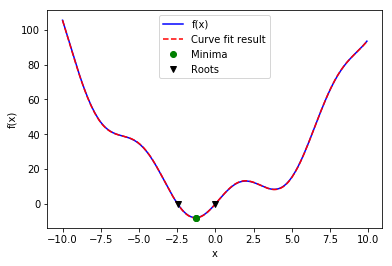

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

## 自習: 2次関数でフィッティングを行わせてみる

params = [ 0.99529825  0.15024972  0.26412763]
params_covariance = [[  2.66917244e-03  -2.90376039e-09  -9.83379204e-02]
 [ -2.90376039e-09   7.80788850e-02   5.74218853e-08]
 [ -9.83379204e-02   5.74218853e-08   6.49956725e+00]]


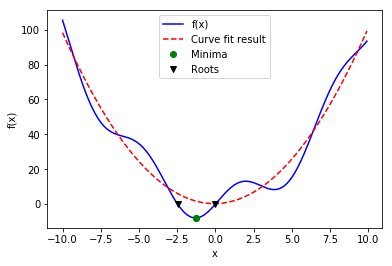

In [52]:
# 二次関数
def f3(x, a, b, c):
    return a*x**2 + b*x + c

params, params_covariance = optimize.curve_fit(f3, xdata, ydata)
print('params =', params)
print('params_covariance =', params_covariance)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f3(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

## IF201708_最小二乗法を擬似逆行列だけで解く

In [104]:
xdata_ = np.expand_dims(xdata, axis=1)
np.ones(xdata_.shape)
X = np.concatenate((xdata_**2, xdata_, np.ones(xdata_.shape)), axis=1)
print(X)

[[ 100.          -10.            1.        ]
 [  80.05540166   -8.94736842    1.        ]
 [  62.32686981   -7.89473684    1.        ]
 [  46.81440443   -6.84210526    1.        ]
 [  33.51800554   -5.78947368    1.        ]
 [  22.43767313   -4.73684211    1.        ]
 [  13.5734072    -3.68421053    1.        ]
 [   6.92520776   -2.63157895    1.        ]
 [   2.49307479   -1.57894737    1.        ]
 [   0.27700831   -0.52631579    1.        ]
 [   0.27700831    0.52631579    1.        ]
 [   2.49307479    1.57894737    1.        ]
 [   6.92520776    2.63157895    1.        ]
 [  13.5734072     3.68421053    1.        ]
 [  22.43767313    4.73684211    1.        ]
 [  33.51800554    5.78947368    1.        ]
 [  46.81440443    6.84210526    1.        ]
 [  62.32686981    7.89473684    1.        ]
 [  80.05540166    8.94736842    1.        ]
 [ 100.           10.            1.        ]]


In [129]:
# 擬似逆行列 X* = (X.T * X)**-1 * X.T
t = np.linalg.inv(np.matmul(X.T, X))
Xs = np.matmul(t, X.T)
print(Xs)

[[ 0.00293019  0.00200487  0.00118236  0.00046266 -0.00015422 -0.00066829
  -0.00107955 -0.00138799 -0.00159361 -0.00169643 -0.00169643 -0.00159361
  -0.00138799 -0.00107955 -0.00066829 -0.00015422  0.00046266  0.00118236
   0.00200487  0.00293019]
 [-0.01357143 -0.01214286 -0.01071429 -0.00928571 -0.00785714 -0.00642857
  -0.005      -0.00357143 -0.00214286 -0.00071429  0.00071429  0.00214286
   0.00357143  0.005       0.00642857  0.00785714  0.00928571  0.01071429
   0.01214286  0.01357143]
 [-0.05795455 -0.02386364  0.00643939  0.03295455  0.05568182  0.07462121
   0.08977273  0.10113636  0.10871212  0.1125      0.1125      0.10871212
   0.10113636  0.08977273  0.07462121  0.05568182  0.03295455  0.00643939
  -0.02386364 -0.05795455]]


In [131]:
params = np.matmul(Xs, ydata)
print(params)

[ 0.99529825  0.1502497   0.26412764]


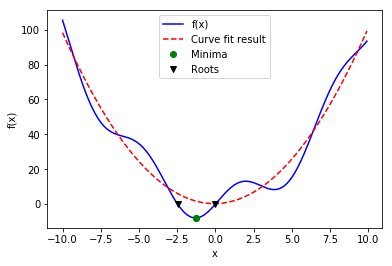

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f3(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')